# K Means Clustering

Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Dataset

In [64]:
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,1:].values
le_x = LabelEncoder()
X[:,0]=le_x.fit_transform(X[:,0])
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X[:,1:]= sc.fit_transform(X[:,1:])
print(X)

[[1 -1.4245687900521393 -1.7389991930659485 -0.43480147996914814]
 [1 -1.2810354107017978 -1.7389991930659485 1.195704069915157]
 [0 -1.3528021003769686 -1.7008297638941763 -1.7159129834496736]
 [0 -1.1375020313514563 -1.7008297638941763 1.0404178270690327]
 [0 -0.5633685139500905 -1.6626603347224038 -0.3959799192576171]
 [0 -1.209268721026627 -1.6626603347224038 1.0015962663575015]
 [0 -0.2763017552494075 -1.6244909055506316 -1.7159129834496736]
 [0 -1.1375020313514563 -1.6244909055506316 1.700384359165061]
 [1 1.804932245330544 -1.5863214763788591 -1.832377665584267]
 [0 -0.6351352036252612 -1.5863214763788591 0.8463100235113773]
 [1 2.0202323143560563 -1.5863214763788591 -1.405340497757425]
 [0 -0.2763017552494075 -1.5863214763788591 1.8944921627227165]
 [0 1.3743321072795196 -1.5481520472070869 -1.3665189370458939]
 [0 -1.0657353416762856 -1.5481520472070869 1.0404178270690327]
 [1 -0.13276837589906598 -1.5481520472070869 -1.444162058468956]
 [1 -1.209268721026627 -1.54815204720708

PCA 

In [65]:
from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents = pca.fit_transform(X)
principalDf = np.array(pd.DataFrame(data = principalComponents))
print(principalDf)

[[-6.00437661e-01 -1.73717898e+00  1.32224740e+00  6.55371930e-01]
 [-1.64988591e+00 -1.78912423e+00  6.77894928e-02  6.93392883e-01]
 [ 3.15381320e-01 -1.69277231e+00  2.17981798e+00 -3.79872195e-01]
 [-1.47798868e+00 -1.78131664e+00  7.85176967e-02 -3.14797498e-01]
 [-6.05449566e-02 -1.67869121e+00  6.88082600e-01 -3.70264799e-01]
 [-1.50296120e+00 -1.74380650e+00  1.56515907e-01 -3.15142180e-01]
 [ 1.07202103e+00 -1.58773793e+00  1.41826744e+00 -4.14303469e-01]
 [-1.94718878e+00 -1.72769057e+00 -3.88555227e-01 -3.00590305e-01]
 [ 2.65927595e+00 -1.45046410e+00  2.62505670e-02  5.18768156e-01]
 [-9.91410265e-01 -1.64691155e+00 -1.40021735e-01 -3.38873378e-01]
 [ 2.50988817e+00 -1.45931005e+00 -4.27949103e-01  5.23518345e-01]
 [-1.47785399e+00 -1.67316678e+00 -1.13493572e+00 -3.22242856e-01]
 [ 1.98742066e+00 -1.47928386e+00  3.70187358e-03 -4.56510878e-01]
 [-1.43412929e+00 -1.62698028e+00  2.69851212e-02 -3.22670103e-01]
 [ 1.01549562e+00 -1.47753230e+00  1.12161761e+00  5.84163604e

Deciding number of clsuters

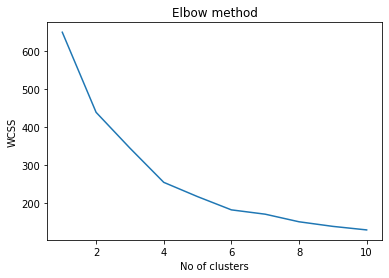

In [66]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters =i, init = 'k-means++',random_state=42)
  kmeans.fit(principalDf)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

Training

In [67]:
kmeans = KMeans(n_clusters =5, init = 'k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(principalDf)
print(np.concatenate((X,y_kmeans.reshape(-1,1)),1))
print(y_kmeans)

[[1 -1.4245687900521393 -1.7389991930659485 -0.43480147996914814 1]
 [1 -1.2810354107017978 -1.7389991930659485 1.195704069915157 0]
 [0 -1.3528021003769686 -1.7008297638941763 -1.7159129834496736 1]
 [0 -1.1375020313514563 -1.7008297638941763 1.0404178270690327 0]
 [0 -0.5633685139500905 -1.6626603347224038 -0.3959799192576171 1]
 [0 -1.209268721026627 -1.6626603347224038 1.0015962663575015 0]
 [0 -0.2763017552494075 -1.6244909055506316 -1.7159129834496736 1]
 [0 -1.1375020313514563 -1.6244909055506316 1.700384359165061 0]
 [1 1.804932245330544 -1.5863214763788591 -1.832377665584267 2]
 [0 -0.6351352036252612 -1.5863214763788591 0.8463100235113773 0]
 [1 2.0202323143560563 -1.5863214763788591 -1.405340497757425 2]
 [0 -0.2763017552494075 -1.5863214763788591 1.8944921627227165 0]
 [0 1.3743321072795196 -1.5481520472070869 -1.3665189370458939 2]
 [0 -1.0657353416762856 -1.5481520472070869 1.0404178270690327 0]
 [1 -0.13276837589906598 -1.5481520472070869 -1.444162058468956 1]
 [1 -1.209

Visualization

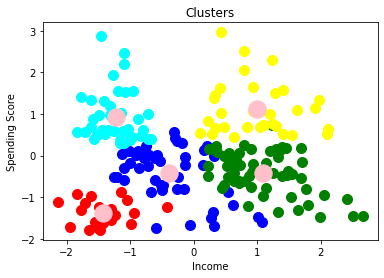

[0.4095285  0.3081674  0.20723465 0.07506945]


In [68]:
plt.scatter(principalDf[y_kmeans==0,0],principalDf[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(principalDf[y_kmeans==1,0],principalDf[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(principalDf[y_kmeans==2,0],principalDf[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(principalDf[y_kmeans==3,0],principalDf[y_kmeans==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(principalDf[y_kmeans==4,0],principalDf[y_kmeans==4,1],s=100,c='cyan',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c = 'pink')
plt.title('Clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()
print(pca.explained_variance_ratio_)